### Making degree distribution plots

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import operator
import collections
import powerlaw


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx



pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/unhcr_time_series_normalized.csv")
df = df[df['type']=="Refugees (incl. refugee-like situations)"]


from_to_values = df.groupby(["origin",'destination'])['value'].sum().reset_index().sort_values("value", ascending=False)
#print(from_to_values)


edge_list=from_to_values[['origin', 'destination', 'value']]
edges = list(map(tuple, list(edge_list.values)))
DG = nx.DiGraph()
DG.add_weighted_edges_from(edges)



In [3]:
def make_plots(year):
    df = pd.read_csv("../data/unhcr_time_series_normalized.csv")
    df = df[df['type']=="Refugees (incl. refugee-like situations)"]
    

    from_to_values = df.groupby(["origin",'destination'])['value'].sum().reset_index().sort_values("value", ascending=False)
    #print(from_to_values)


    edge_list=from_to_values[['origin', 'destination', 'value']]
    edges = list(map(tuple, list(edge_list.values)))
    DG = nx.DiGraph()
    DG.add_weighted_edges_from(edges)



    df = df[df['year']==year]

    # Indegree plot
    x = [d for n, d in DG.in_degree()]
    num_bins =5

    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(211)

    # the histogram of the data
    n, bins, patches = ax.hist(x, num_bins, density=1)
    plt.title(str(year)+' Indegree distribution')
    plt.xlabel('Indegree')
    plt.ylabel('probability')

    # outdegree plot
    ax = fig.add_subplot(212)
    x = [d for n, d in DG.out_degree()]
    #print(x)
    num_bins =5

    # the histogram of the data
    n, bins, patches = ax.hist(x, num_bins, density=1)
    plt.title(str(year)+' Outdegree distribution')
    plt.xlabel('Outdegree')
    plt.ylabel('probability')

    plt.savefig('../Visualization/src/media/'+str(year)+'_degree_distribution.png')

    plt.show()



In [4]:
years = list(set(df.year.tolist()))
years

[2016, 2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

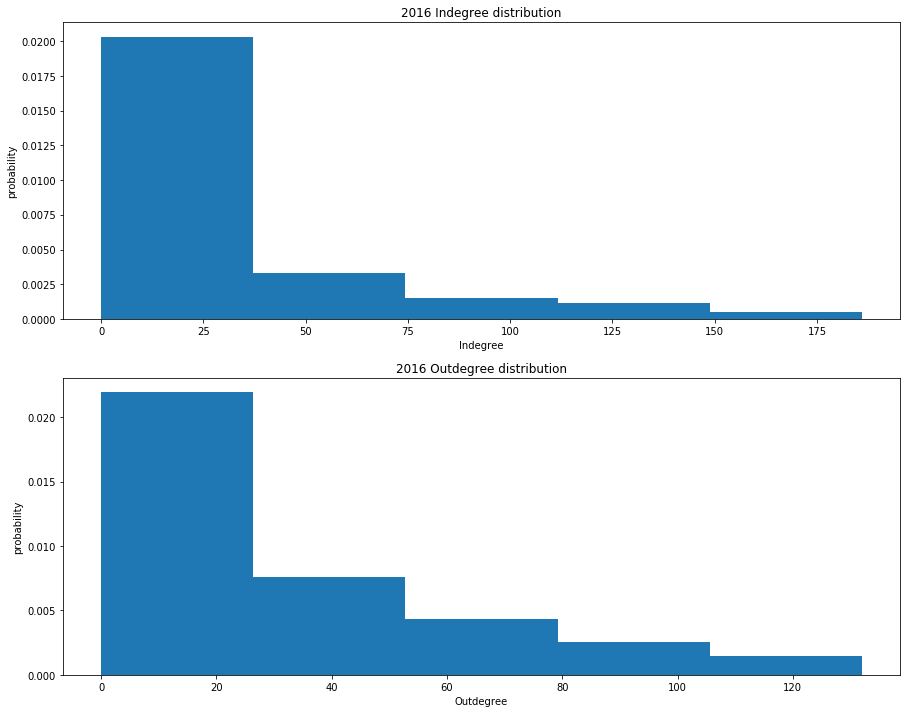

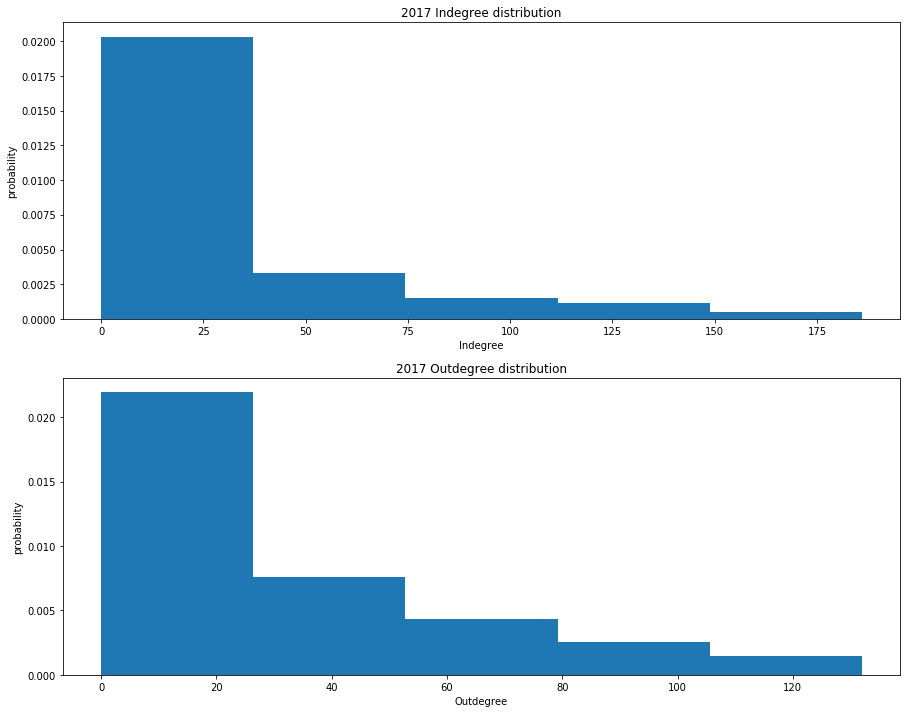

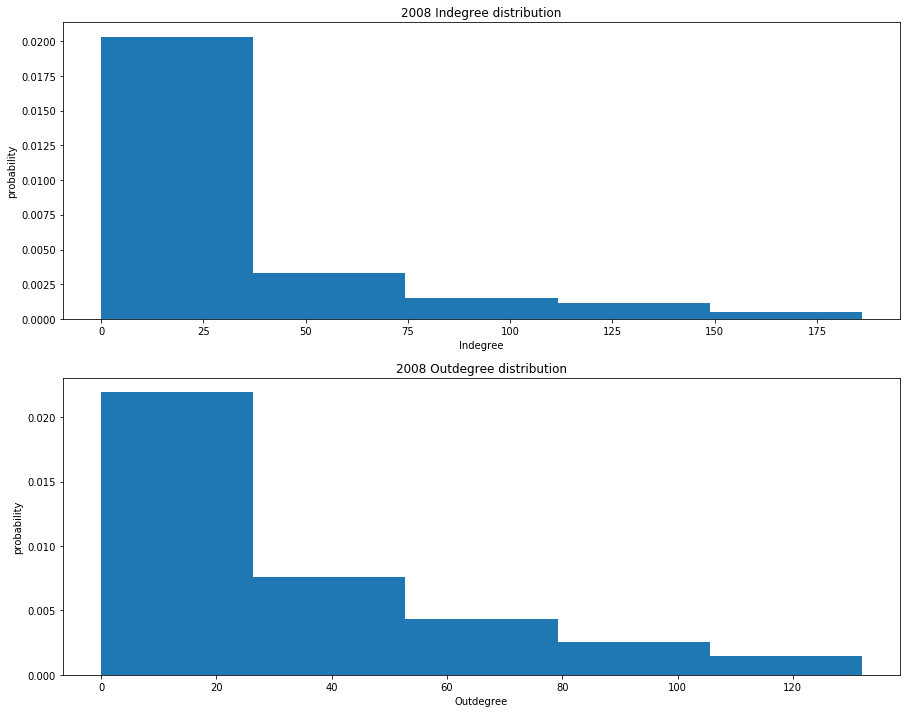

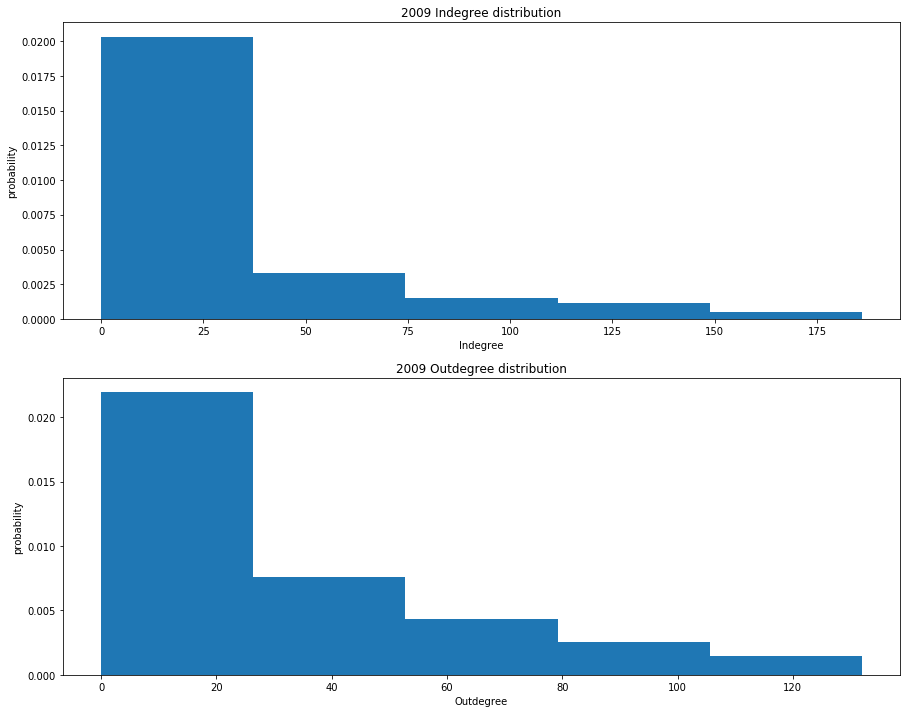

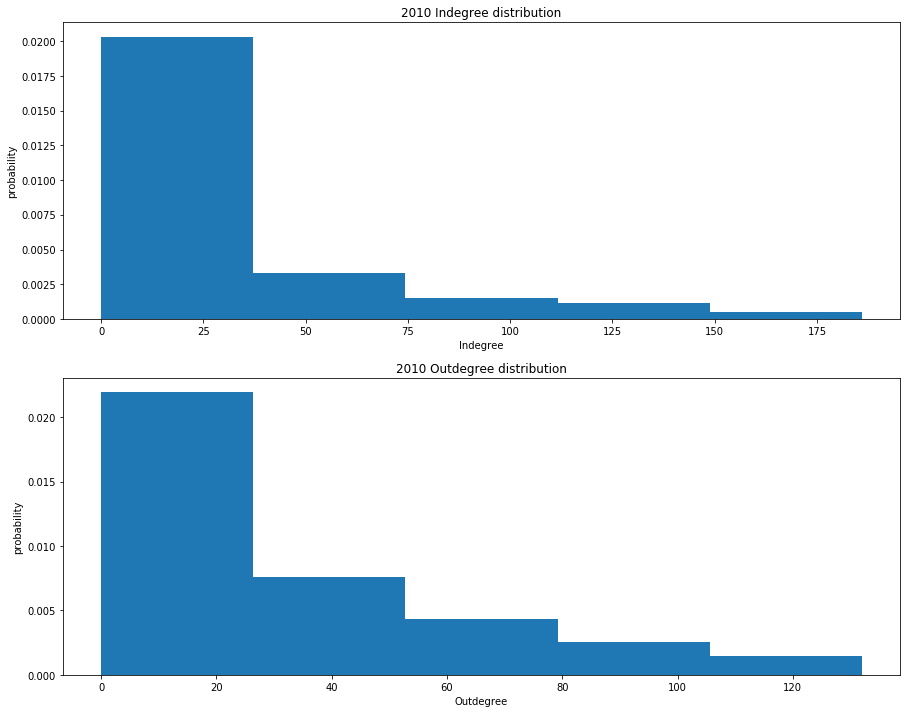

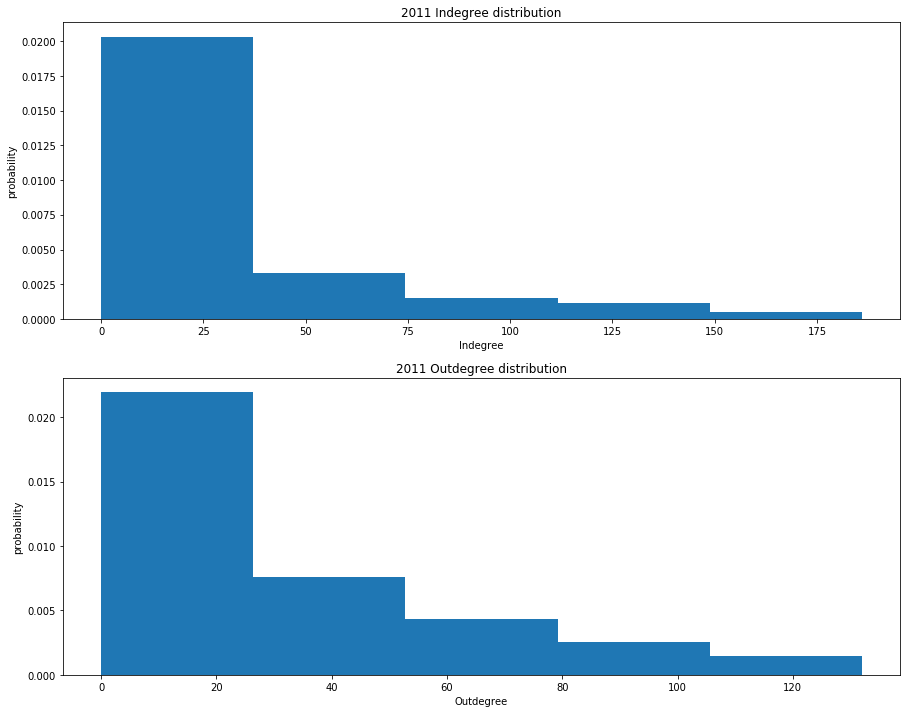

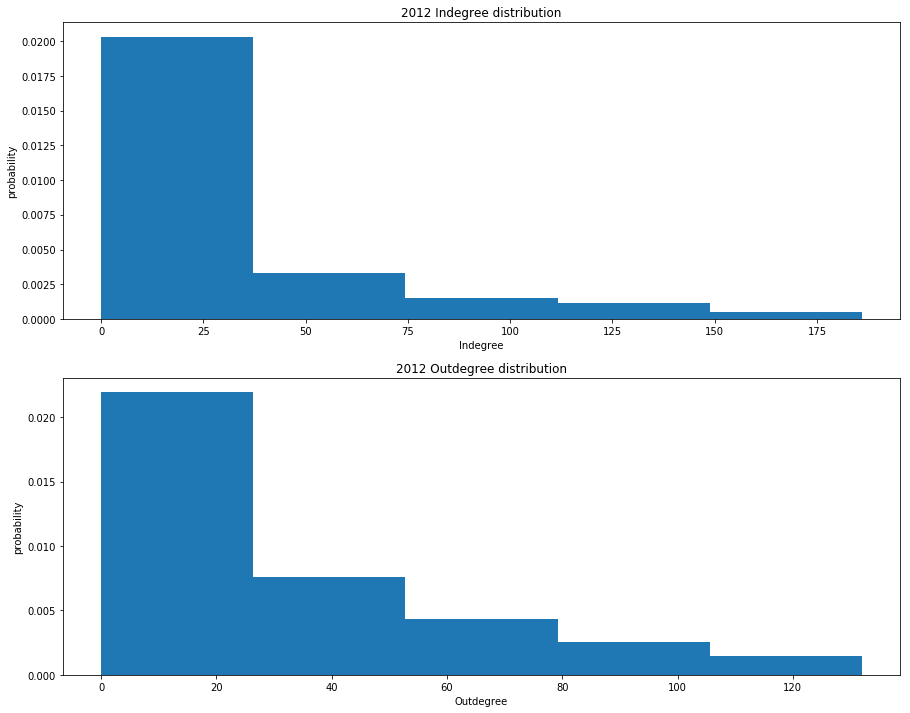

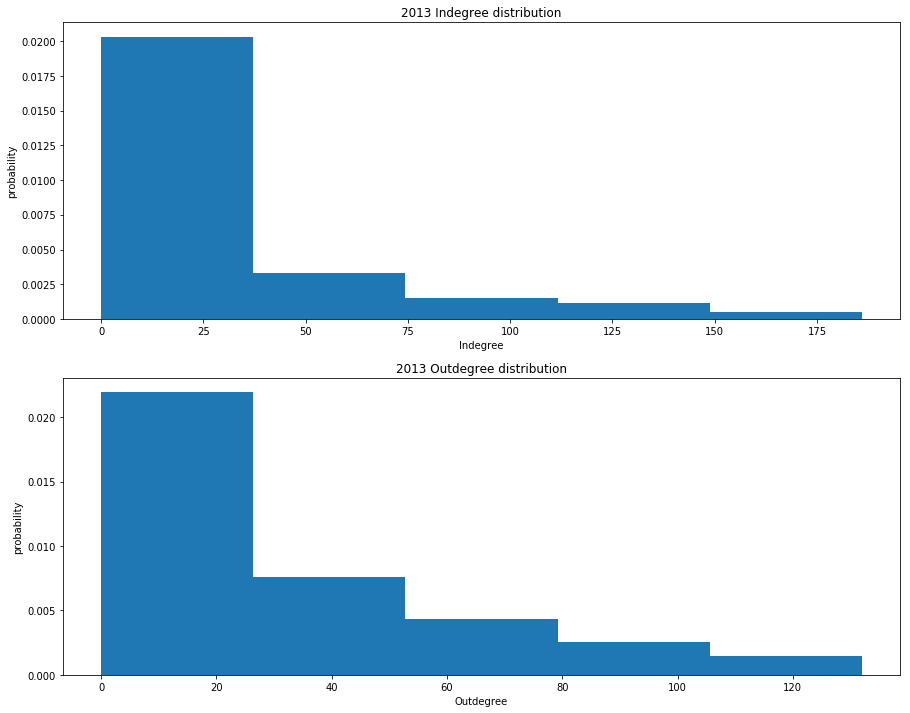

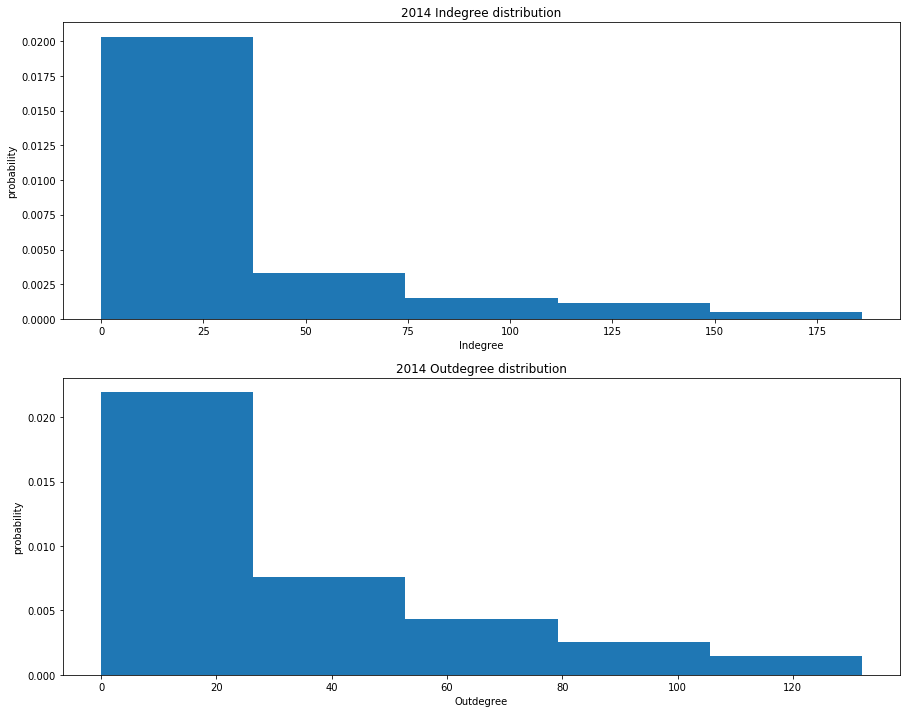

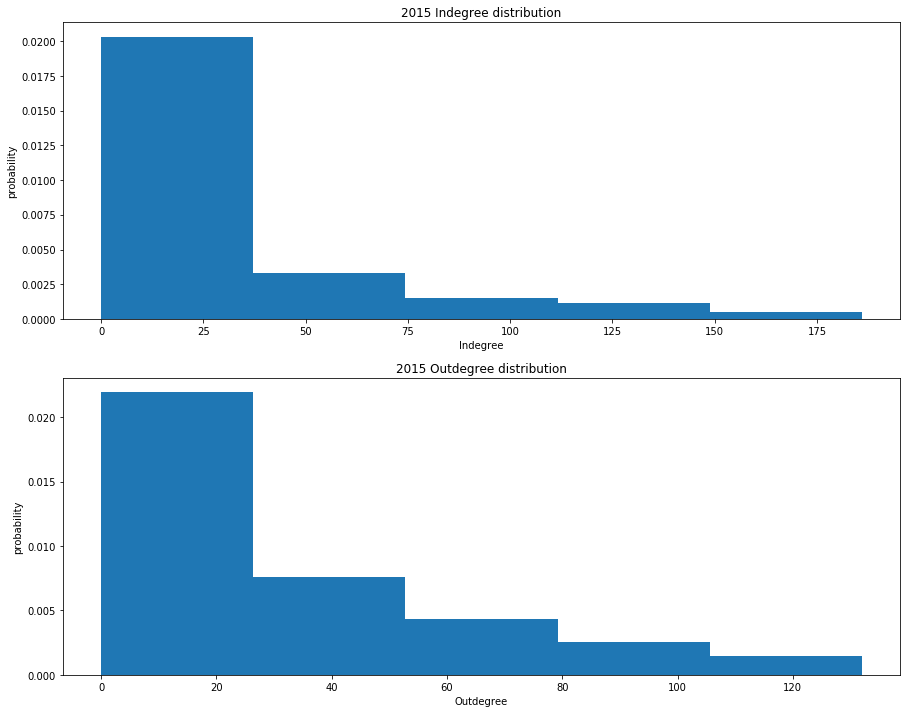

In [5]:
for year in years:
    make_plots(year)